In [301]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [302]:
inst = pd.read_csv('instructors.csv', names=['date','cumulative instructors trained'], parse_dates=['date'])
work = pd.read_csv('workshops.csv', names=['date', 'cumulative workshops run'], parse_dates=['date'])
lern = pd.read_csv('learners.csv', names=['date','cumulative learners reached'], parse_dates=['date'])

In [303]:
full = pd.merge(work, lern, on='date')
full['learners reached'] = full['cumulative learners reached'].diff().fillna(full['cumulative learners reached'])
full['workshops run'] = full['cumulative workshops run'].diff().fillna(full['cumulative workshops run'])
full['workshop size'] = full['learners reached']/full['workshops run']
full['date_int'] = full.date.astype(np.int64)

full

,date,cumulative workshops run,cumulative learners reached,learners reached,workshops run,workshop size,date_int
0,2011-11-07,1,22,22,1,22.000000,1320624000000000000
1,2012-01-18,2,36,14,1,14.000000,1326844800000000000
2,2012-02-20,3,86,50,1,50.000000,1329696000000000000
3,2012-02-23,4,114,28,1,28.000000,1329955200000000000
4,2012-03-07,5,153,39,1,39.000000,1331078400000000000
5,2012-03-26,6,191,38,1,38.000000,1332720000000000000
6,2012-03-28,7,226,35,1,35.000000,1332892800000000000
7,2012-04-02,8,261,35,1,35.000000,1333324800000000000
8,2012-04-14,9,293,32,1,32.000000,1334361600000000000
9,2012-04-15,10,302,9,1,9.000000,1334448000000000000


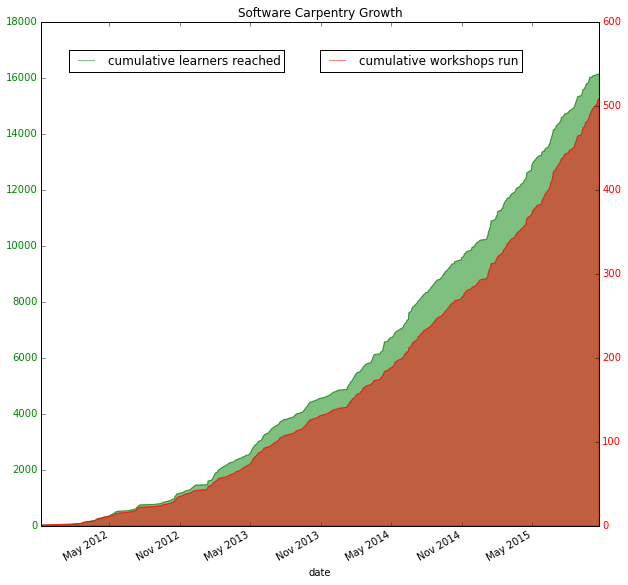

In [326]:
ax1 = lern.plot(x='date', figsize=(10.0,10.0), title="Software Carpentry Growth", kind='area', stacked=False, alpha=0.5, color='g')
ax2 = ax1.twinx()
ax2 = work.plot(x='date', color='r', ax=ax2, kind='area', stacked=False, alpha=0.5)
ax2.legend(loc=0)
ax1.legend(loc = (0.05,0.9))
ax2.legend(loc = (0.5,0.9))
 
for tl in ax1.get_yticklabels():
    tl.set_color('g')
for tl in ax2.get_yticklabels():
    tl.set_color('r')


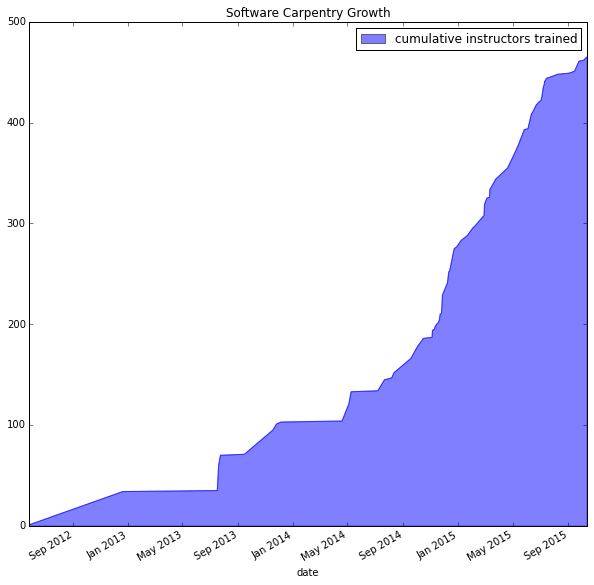

In [333]:
ax1 = inst.plot(x='date', figsize=(10.0,10.0), title="Software Carpentry Growth", kind='area', stacked=False, alpha=0.5, color='b')


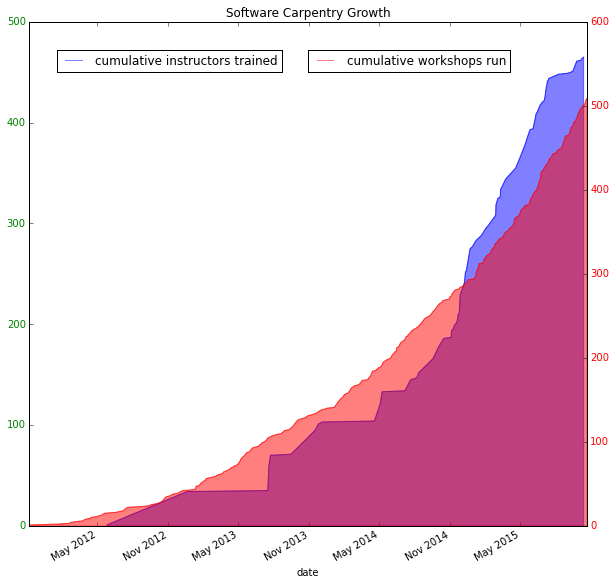

In [334]:
ax1 = inst.plot(x='date', figsize=(10.0,10.0), title="Software Carpentry Growth", kind='area', stacked=False, alpha=0.5, color='b')
ax2 = ax1.twinx()
ax2 = work.plot(x='date', color='r', ax=ax2, kind='area', stacked=False, alpha=0.5)
ax2.legend(loc=0)
ax1.legend(loc = (0.05,0.9))
ax2.legend(loc = (0.5,0.9))
 
for tl in ax1.get_yticklabels():
    tl.set_color('g')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

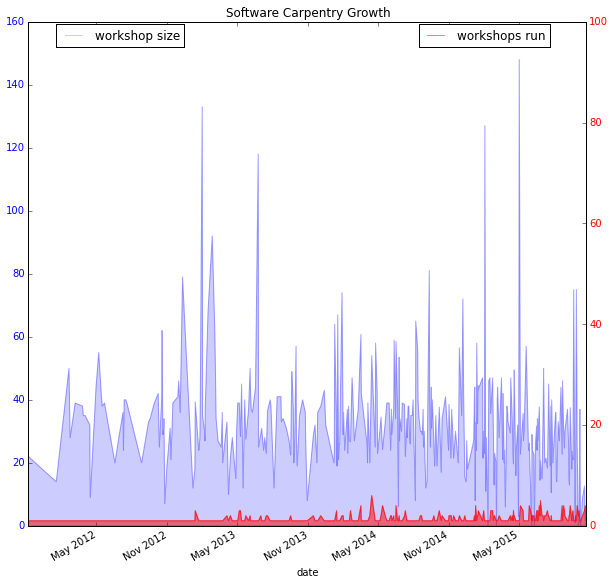

In [305]:
# Workshops and learners, discrete
#ax1 = full.plot(x='date', y='learners reached', figsize=(10.0,10.0), title="Software Carpentry Growth")
ax1 = full.plot(x='date', y='workshop size', figsize=(10.0,10.0), title="Software Carpentry Growth", kind='area', stacked=False, alpha=0.2)

ax2 = ax1.twinx()
ax2 = full.plot(x='date', y='workshops run', color='r', ax=ax2, ylim=(0.0,100.0), kind='area', stacked=False, alpha=0.5)
#ax2 = full.plot(x='date', y='workshop size', color='g', ax=ax2, ylim=(0.0,100.0))

ax2.legend(loc=0)
ax1.legend(loc = (0.05,0.95))
ax2.legend(loc = (0.7,0.95))
 
for tl in ax1.get_yticklabels():
    tl.set_color('b')
for tl in ax2.get_yticklabels():
    tl.set_color('r')


In [306]:
pd.to_datetime(full['date'][:]).month

AttributeError: 'Series' object has no attribute 'month'

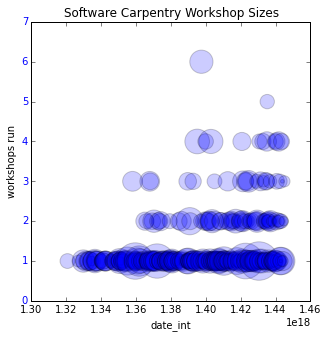

In [346]:
# Workshops and learners, discrete
#ax1 = full.plot(x='date', y='learners reached', figsize=(10.0,10.0), title="Software Carpentry Growth")
ax1.clear()
ax1 = full.plot(kind='scatter',x='date_int',y='workshops run', s=full['workshop size']*10, figsize=(5.0,5.0), title="Software Carpentry Workshop Sizes", alpha=0.2)
ax1.legend(loc = (0.05,0.95))

for tl in ax1.get_yticklabels():
    tl.set_color('b')



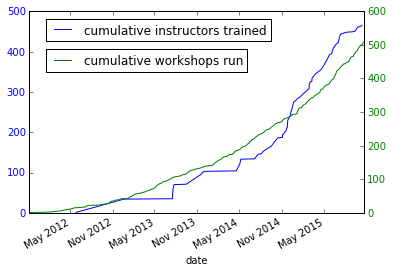

In [345]:
ax1 = inst.plot(x='date')
ax2 = ax1.twinx()
ax2 = work.plot(x='date', color='g', ax=ax2)
ax1.legend(loc = (0.05,0.85))
ax2.legend(loc = (0.05,0.7))

for tl in ax1.get_yticklabels():
    tl.set_color('b')

for t2 in ax2.get_yticklabels():
    t2.set_color('g')



In [335]:
full

,date,cumulative workshops run,cumulative learners reached,learners reached,workshops run,workshop size,date_int
0,2011-11-07,1,22,22,1,22.000000,1320624000000000000
1,2012-01-18,2,36,14,1,14.000000,1326844800000000000
2,2012-02-20,3,86,50,1,50.000000,1329696000000000000
3,2012-02-23,4,114,28,1,28.000000,1329955200000000000
4,2012-03-07,5,153,39,1,39.000000,1331078400000000000
5,2012-03-26,6,191,38,1,38.000000,1332720000000000000
6,2012-03-28,7,226,35,1,35.000000,1332892800000000000
7,2012-04-02,8,261,35,1,35.000000,1333324800000000000
8,2012-04-14,9,293,32,1,32.000000,1334361600000000000
9,2012-04-15,10,302,9,1,9.000000,1334448000000000000
